<a href="https://colab.research.google.com/github/pmadhurn/ML_Indus/blob/main/IU2241230464_ML_PR_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  PRACTICAL 4 :
  Write a Python program to implement Simple Linear Regression
- How many total observations in data?
- How many independent variables?
- Which is a dependent variable?
- Quantify the goodness of your model and discuss steps taken for improvement (RMSE, SSE, R2Score).


Question 1: How many total observations in data?

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data.csv')
# Count total number of rows in the dataset
total_observations = len(df)
print("Total Observations")
print("="*40)
print(f"Total number of observations: {total_observations}")
print(f"Shape of dataset: {df.shape}")

Total Observations
Total number of observations: 50000
Shape of dataset: (50000, 5)


Question 2: How many independent variables?

In [10]:
print("\nIndependent Variables")
print("="*40)
print("All columns in dataset:", df.columns.tolist())
independent_variables = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
print(f"\nNumber of independent variables: {len(independent_variables)}")
print("Independent variables are:")
for i, var in enumerate(independent_variables, 1):
    print(f"  {i}. {var}")


Independent Variables
All columns in dataset: ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

Number of independent variables: 4
Independent variables are:
  1. SquareFeet
  2. Bedrooms
  3. Bathrooms
  4. YearBuilt


Question 3: Which is a dependent variable?

In [6]:
print("\nDependent Variable")
print("="*40)
dependent_variable = 'Price'
print(f"Dependent variable: {dependent_variable}")
print(f"Description: The variable we want to predict (house price)")


Dependent Variable
Dependent variable: Price
Description: The variable we want to predict (house price)


Implementation of Simple Linear Regression

SIMPLE LINEAR REGRESSION IMPLEMENTATION
Training samples: 40000
Testing samples: 10000

Regression Equation:
Price = 25511.19 + 99.35 × SquareFeet


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


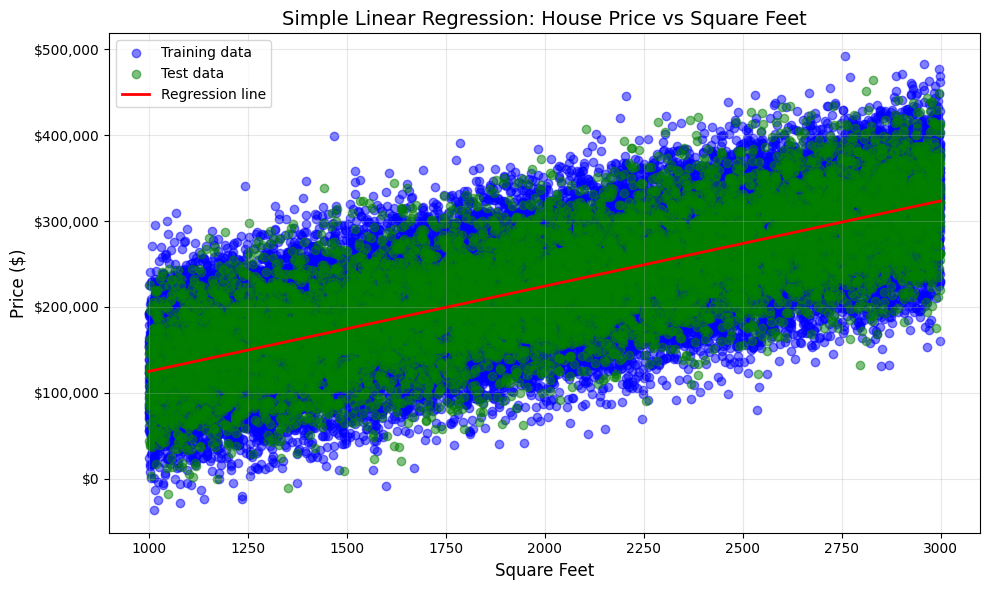

In [17]:
print("SIMPLE LINEAR REGRESSION IMPLEMENTATION")
print("="*50)
X = df[['SquareFeet']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"\nRegression Equation:")
print(f"Price = {model.intercept_:.2f} + {model.coef_[0]:.2f} × SquareFeet")
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test data')
X_range = np.linspace(X.min(), X.max(), 100)
y_range_pred = model.predict(X_range)
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Square Feet', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Simple Linear Regression: House Price vs Square Feet', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

Question 4: Quantify the goodness of your model


In [19]:
print("\nModel Evaluation Metrics")
print("="*40)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n1. RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print("   - Interpretation: Average prediction error in dollars")
sse = np.sum((y_test - y_pred) ** 2)
print(f"\n2. SSE (Sum of Squared Errors): ${sse:,.2f}")
print("   - Interpretation: Total squared prediction errors")
r2 = r2_score(y_test, y_pred)
print(f"\n3. R² Score: {r2:.4f} ({r2*100:.2f}%)")
print("   - Interpretation: Percentage of variance explained by the model")


Model Evaluation Metrics

1. RMSE (Root Mean Squared Error): $49,661.78
   - Interpretation: Average prediction error in dollars

2. SSE (Sum of Squared Errors): $24,662,918,995,675.75
   - Interpretation: Total squared prediction errors

3. R² Score: 0.5703 (57.03%)
   - Interpretation: Percentage of variance explained by the model


Practical : 5

Implementation of Multiple Linear Regression for House Price Prediction
using sklearn.

Dataset shape: 50000 rows × 5 columns

First 5 records:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt        Price
0        2126         4          1       1969  215355.2836
1        2459         3          2       1980  195014.2216
2        1860         2          1       1970  306891.0121
3        2294         2          1       1996  206786.7872
4        2130         5          2       2001  272436.2391

Statistical Summary:
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165400
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860250
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141150
75%     2506.000000      4.00

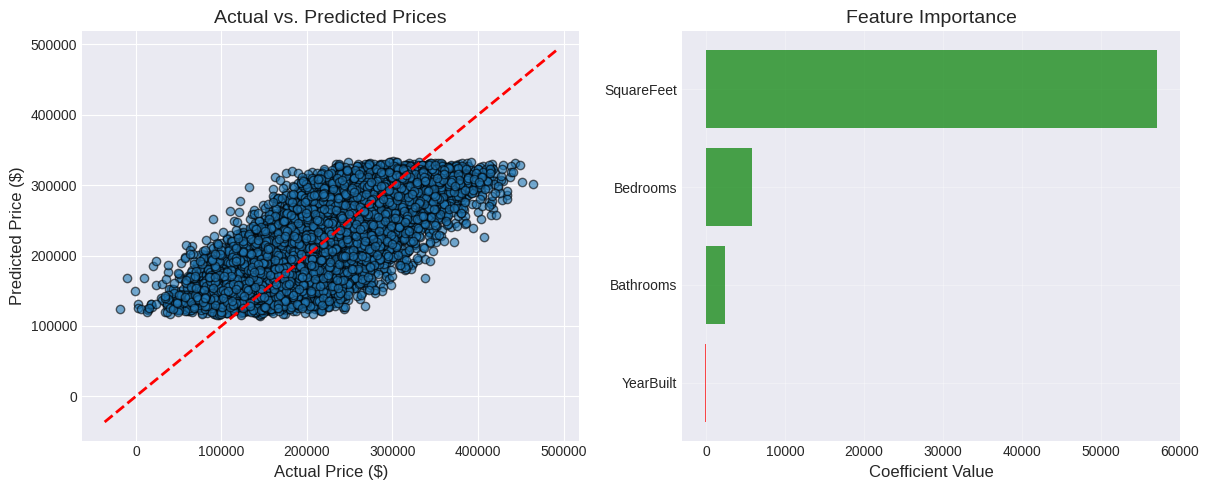

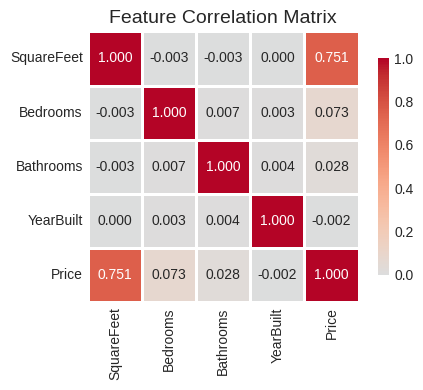


Correlations with Price:
  SquareFeet: 0.751
  Bedrooms: 0.073
  Bathrooms: 0.028
  YearBuilt: -0.002


 PREDICTING ON NEW DATA
--------------------------------------------------
New houses to predict:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt
0        1500         3          2       1995
1        2000         4          2       2005
2        2500         4          3       2015

Predicted Prices for new houses:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt  PredictedPrice
0        1500         3          2       1995       171845.16
1        2000         4          2       2005       226694.94
2        2500         4          3       2015       279278.69


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df = pd.read_csv('/content/data.csv')
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 records:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())
print(f"\nMissing values check: {df.isnull().sum().sum()} missing values found.")
features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
target = 'Price'
X = df[features]
y = df[target]
print(f"Features (X): {features}")
print(f"Target (y): {target}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")
print("\n\nFEATURE SCALING")
print("-"*50)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaling_info = pd.DataFrame({
    'Feature': features,
    'Mean': scaler.mean_,
    'Std Dev': scaler.scale_})
print("\nScaling Parameters:")
print(scaling_info.to_string(index=False))
print("Features have been standardized (scaled).")
print("\n\nBUILDING AND TRAINING THE MODEL")
print("-"*50)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Multiple Linear Regression model trained successfully.")
print("\nModel Coefficients:")
print(f"  • Intercept (β₀): ${model.intercept_:,.2f}")
for feature, coef in zip(features, model.coef_):
    print(f"  • Coefficient for {feature}: {coef:,.2f}")
print("\n\nEVALUATING MODEL PERFORMANCE")
print("-"*50)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Performance on the Test Set:")
print(f"  • R-squared (R²): {r2:.4f}")
print(f"  • Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"  • Root Mean Squared Error (RMSE): ${rmse:,.2f}")
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Prices', fontsize=14)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.grid(True)
plt.subplot(1, 3, 2)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coef': np.abs(model.coef_)
}).sort_values('Coefficient')
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.figure(figsize=(5, 4))
corr_matrix = df[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()
print("\nCorrelations with Price:")
price_corr = corr_matrix['Price'].drop('Price').sort_values(ascending=False)
for feature, corr in price_corr.items():
    print(f"  {feature}: {corr:.3f}")
# MAKING PREDICTIONS ON NEW, UNSEEN DATA
print("\n\n PREDICTING ON NEW DATA")
print("-"*50)
new_houses = pd.DataFrame({
    'SquareFeet': [1500, 2000, 2500],
    'Bedrooms': [3, 4, 4],
    'Bathrooms': [2, 2, 3],
    'YearBuilt': [1995, 2005, 2015]
})
print("New houses to predict:")
print(new_houses)
#Use the same scaler that was fitted on the training data
new_houses_scaled = scaler.transform(new_houses)
predicted_prices = model.predict(new_houses_scaled)
new_houses['PredictedPrice'] = predicted_prices
print("\nPredicted Prices for new houses:")
print(new_houses.round(2))



STEP 8: PREDICTING ON NEW DATA
--------------------------------------------------
New houses to predict:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt
0        1500         3          2       1995
1        2000         4          2       2005
2        2500         4          3       2015

Predicted Prices for new houses:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt  PredictedPrice
0        1500         3          2       1995       171845.16
1        2000         4          2       2005       226694.94
2        2500         4          3       2015       279278.69
